In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import mode

%matplotlib inline

In [2]:
train = pd.read_csv('/home/sagar/SalesForecasting/dataset/Train1.csv')
test = pd.read_csv('/home/sagar/SalesForecasting/dataset/Test1.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


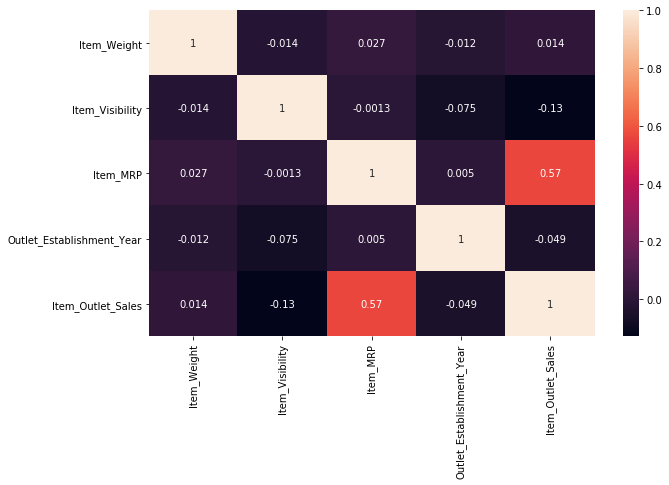

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


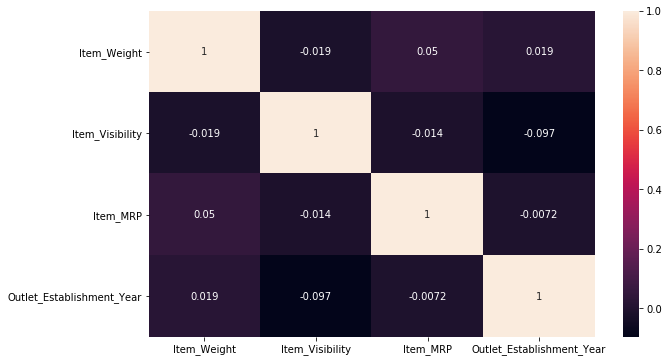

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(test.corr(),annot=True)

In [9]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


/home/sagar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [11]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [12]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [13]:
#missing value cleaning steps
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [14]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales               0
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [15]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [17]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [18]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [19]:
data.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [20]:
data.Item_Type .value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

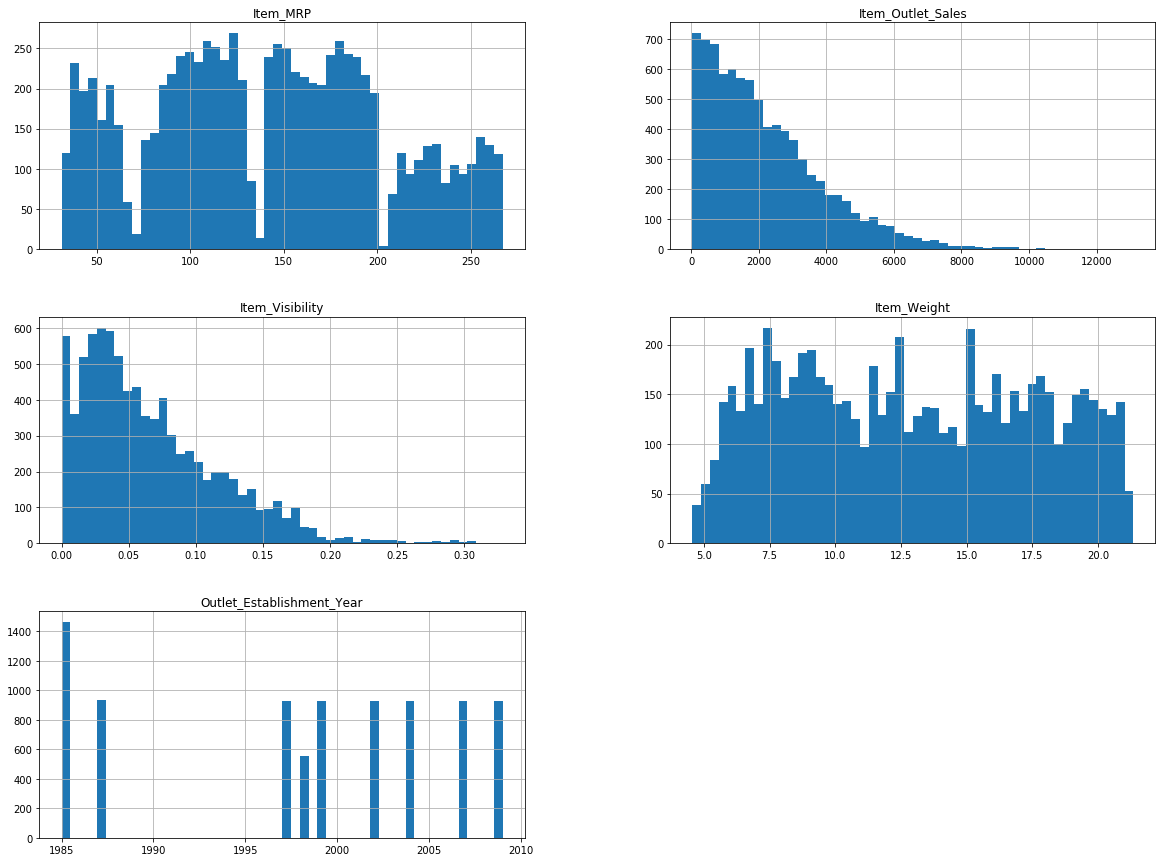

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Text(0.5,1,'Percentage sold Per Item_type ')

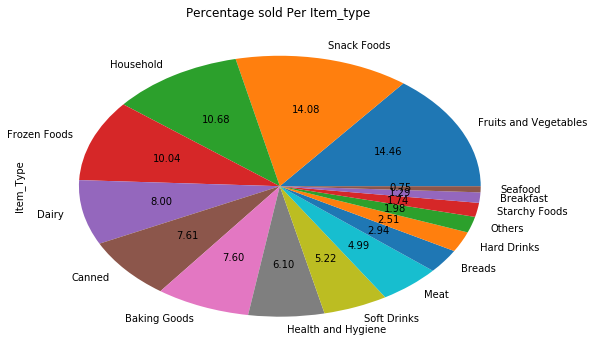

In [22]:
train.Item_Type.value_counts(normalize = True).plot(kind = 'pie', figsize=(9, 6), autopct='%.2f')

plt.title('Percentage sold Per Item_type ' )

In [23]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Text(0.5,1,'Percentage sold Per Item_Type_Category')

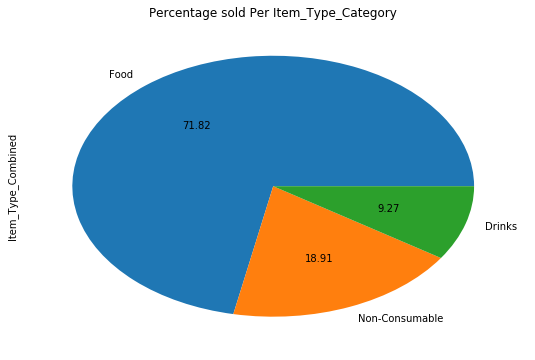

In [24]:
data.Item_Type_Combined.value_counts(normalize = True).plot(kind = 'pie', figsize=(9, 6), autopct='%.2f')

plt.title('Percentage sold Per Item_Type_Category' )

In [25]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Item_Type_Combined'],
      dtype='object')

In [26]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [27]:
data['Years_of_Operation'] = 2018 - data['Outlet_Establishment_Year']

Text(0.5,0,'Outlet_Type')

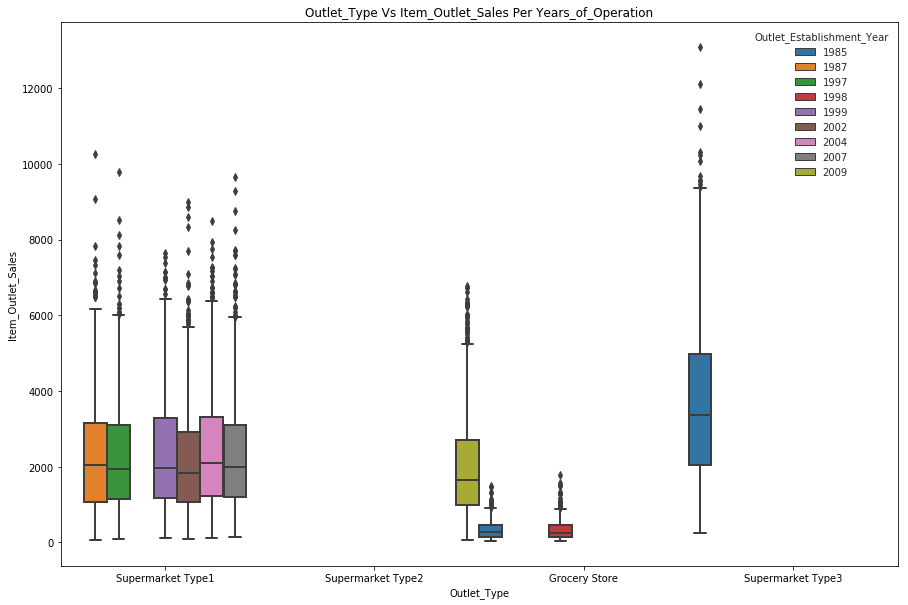

In [28]:
ig, ax = plt.subplots(figsize=(15,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Type", hue = 'Outlet_Establishment_Year', linewidth = 2, width=1 , data=train)

plt.title('Outlet_Type Vs Item_Outlet_Sales Per Years_of_Operation' )
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Type')

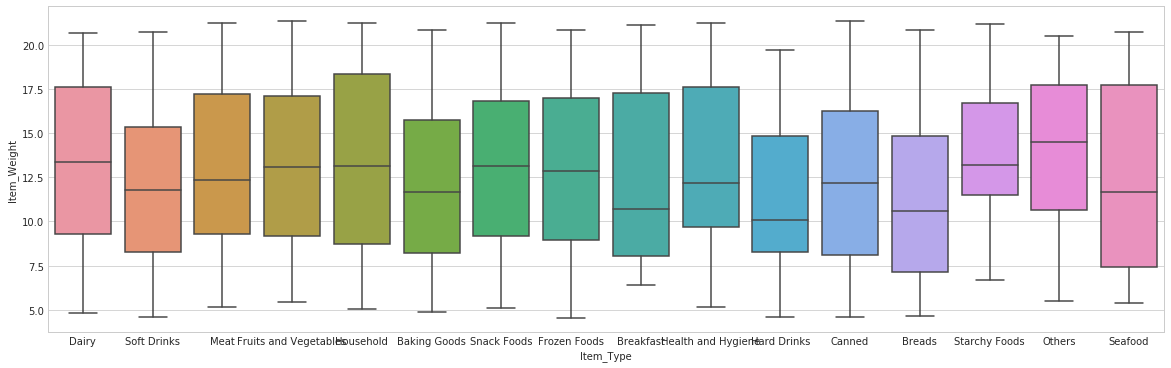

In [29]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Type',y='Item_Weight',data=train)

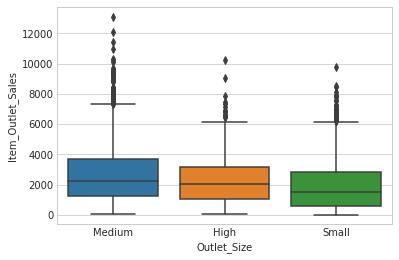

In [30]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data= train)

Text(0.5,1,'Outlet Sales Vs Item_Type Per Outlet_Type')

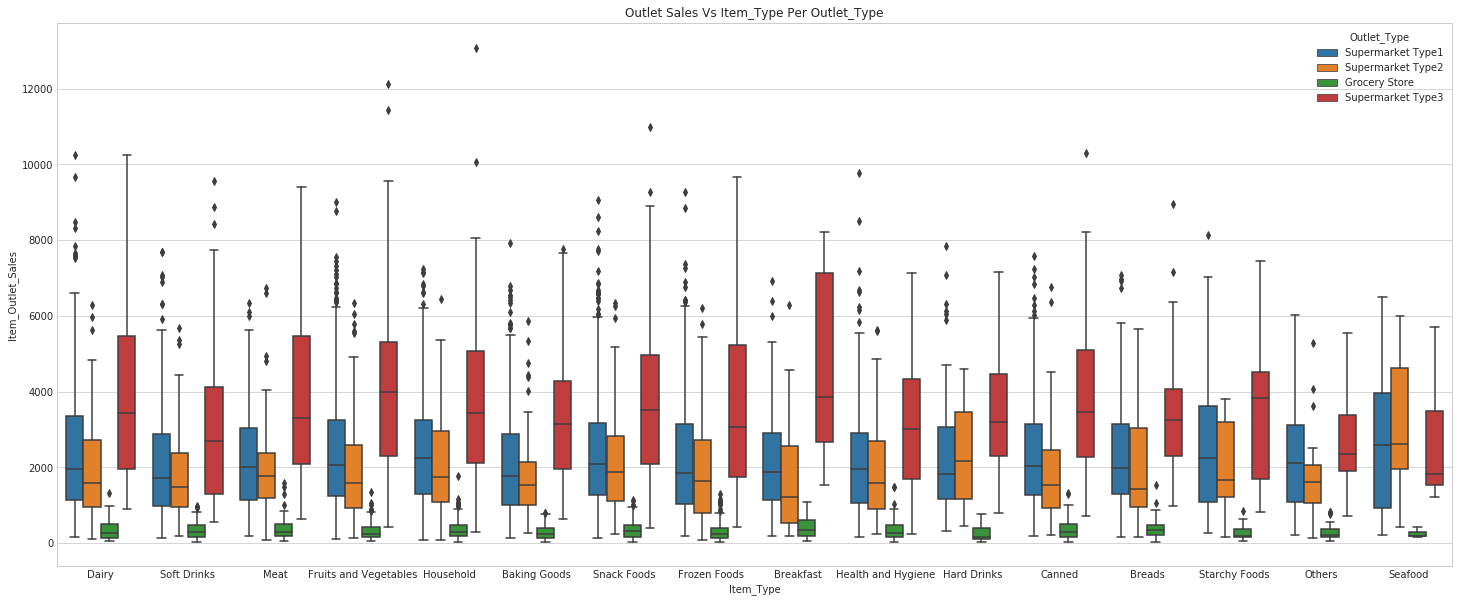

In [31]:
fig, ax = plt.subplots(figsize=(25,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Item_Type", hue = 'Outlet_Type', data=train)

plt.title('Outlet Sales Vs Item_Type Per Outlet_Type')

In [32]:
data[data.Item_Visibility== 0].shape

(879, 15)

In [33]:
data['Item_Visibility'] = data.Item_Visibility.apply(lambda x: x if x>0 else pd.np.nan)
data.Item_Visibility = data.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.fillna(x.mean()))
data[data.Item_Visibility == 0].shape

(0, 15)

Text(0.5,21.7063,'Item_Visibility')

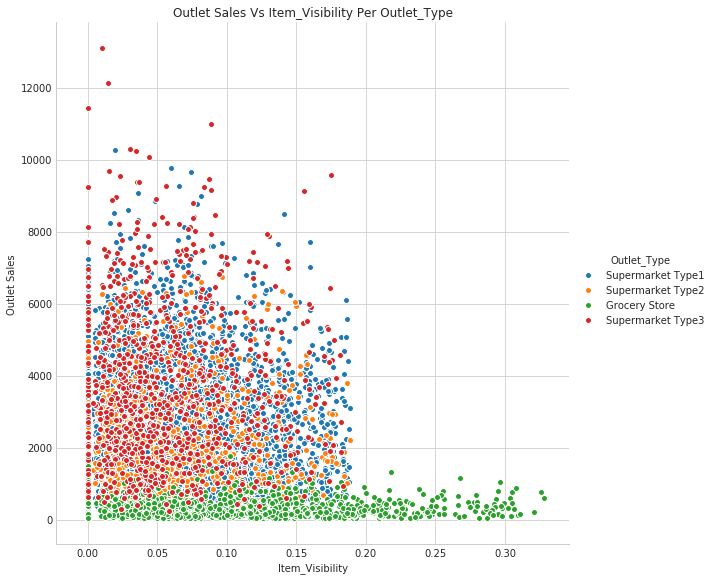

In [34]:
sns.pairplot(x_vars=["Item_Visibility"], y_vars=["Item_Outlet_Sales"], data=train, hue="Outlet_Type", size=8)

plt.title('Outlet Sales Vs Item_Visibility Per Outlet_Type')
plt.ylabel('Outlet Sales')
plt.xlabel('Item_Visibility')

Text(0.5,0,'Outlet_Identifier')

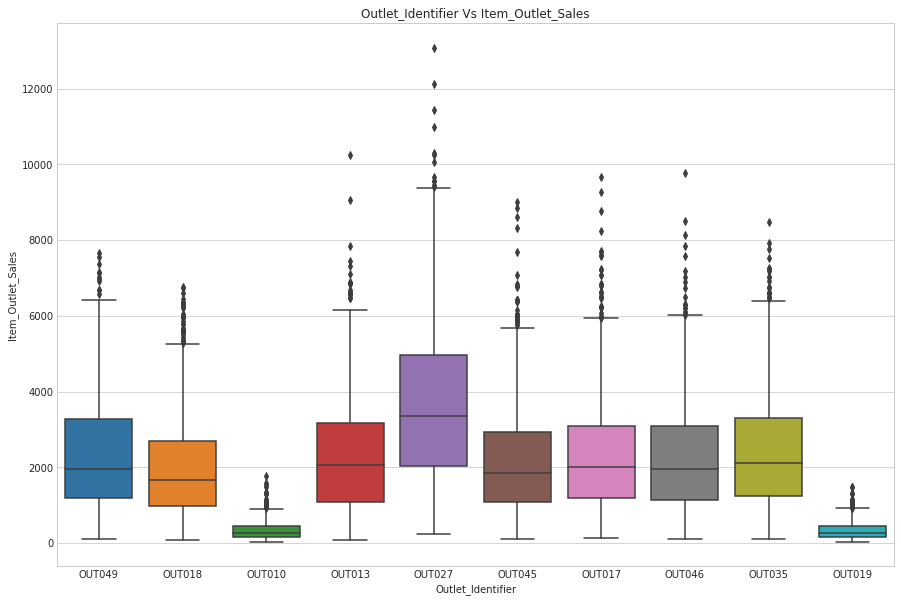

In [35]:
fig, ax = plt.subplots(figsize=(15,  10))
sns.set_style("whitegrid")
ax = sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Identifier", order=None, data=train)

plt.title('Outlet_Identifier Vs Item_Outlet_Sales')
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')

Text(0.5,0,'Outlet_Type')

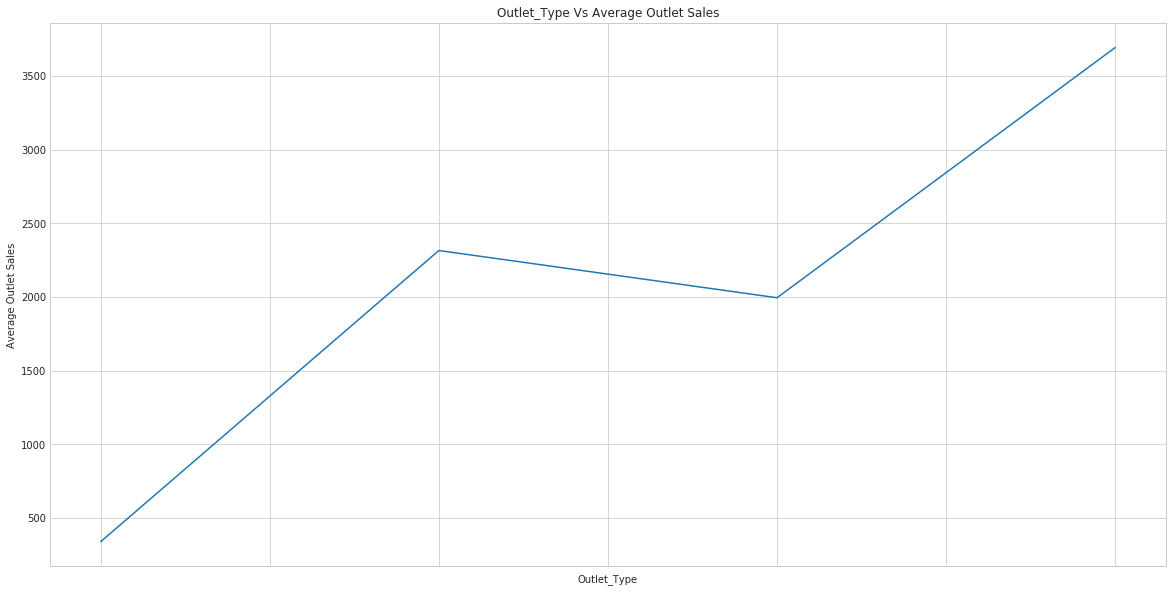

In [36]:
train.groupby('Outlet_Type').Item_Outlet_Sales.mean().plot(kind = 'line', figsize=(20, 10))

plt.title('Outlet_Type Vs Average Outlet Sales' )
plt.ylabel('Average Outlet Sales')
plt.xlabel('Outlet_Type')

Text(0.5,0,'Outlet_Size')

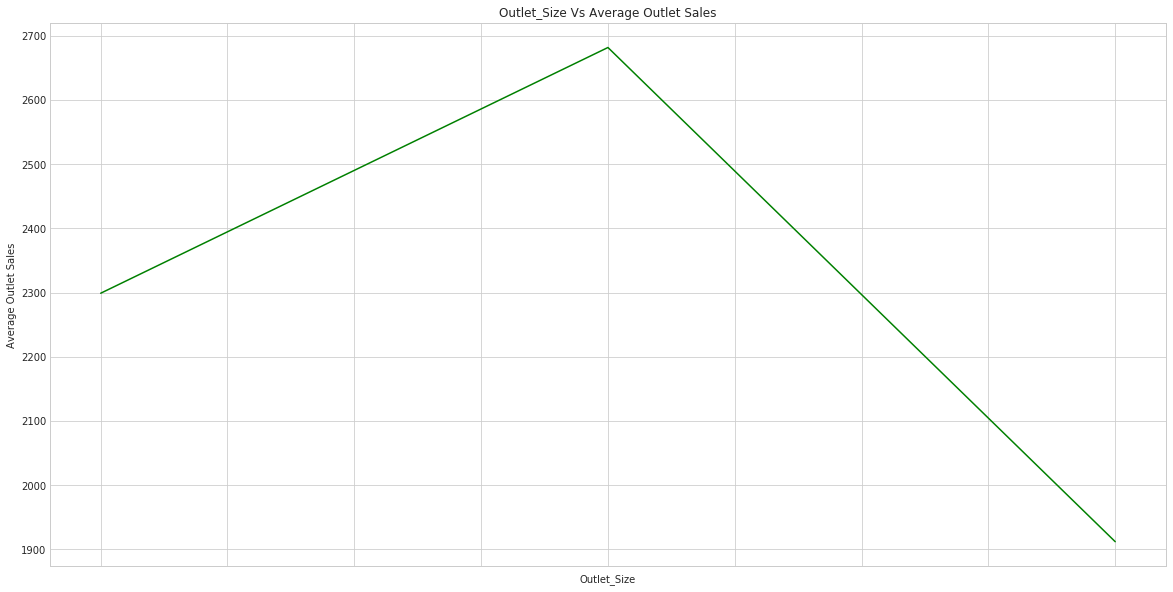

In [37]:
train.groupby('Outlet_Size').Item_Outlet_Sales.mean().plot(kind = 'line', c = 'g', figsize=(20, 10)) 

plt.title('Outlet_Size Vs Average Outlet Sales' )
plt.ylabel('Average Outlet Sales')
plt.xlabel('Outlet_Size')

In [38]:
ndf_sale=data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]

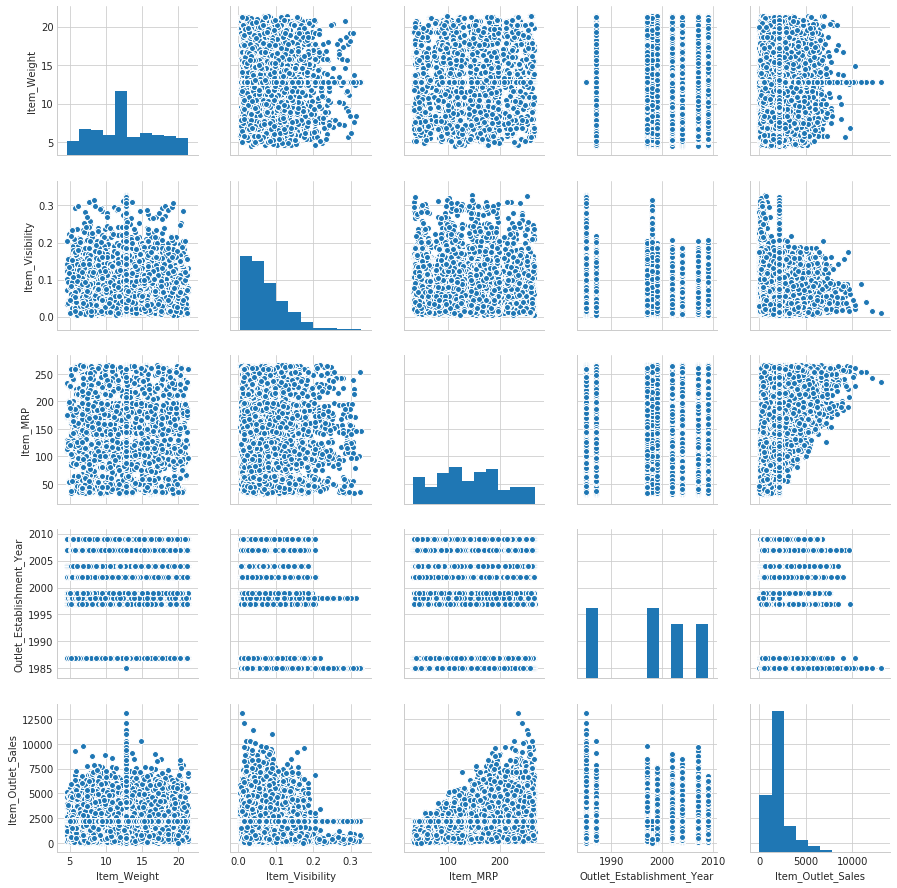

In [39]:
sns.pairplot(ndf_sale)

Text(0.5,0,'Item_Type')

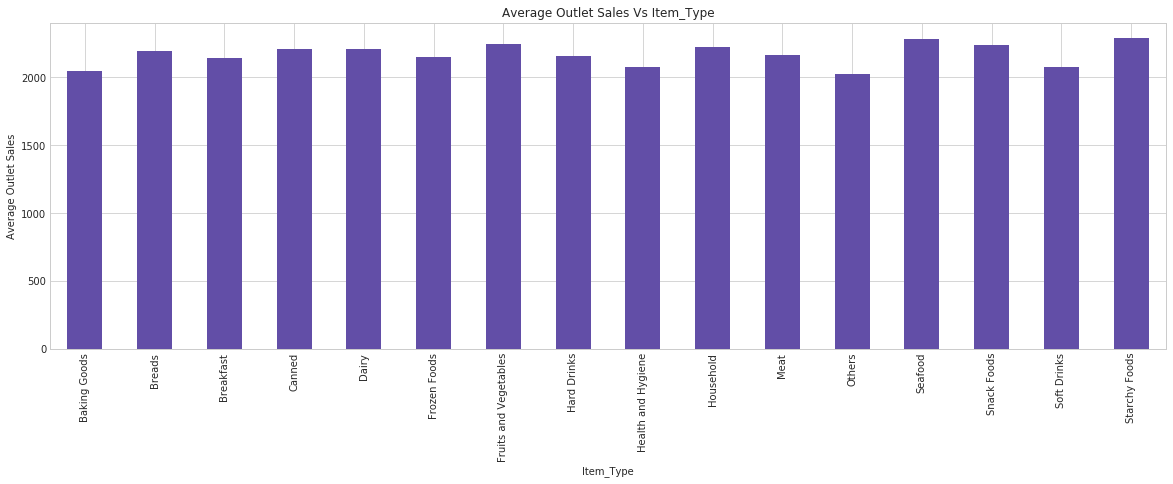

In [40]:
color = ['r', 'g', 'b', 'y', 'm', '#624ea7', '']
data.groupby('Item_Type').Item_Outlet_Sales.mean().sort_index().plot(kind = 'bar', color = '#624ea7', figsize=(20, 6))
plt.title('Average Outlet Sales Vs Item_Type')
plt.ylabel('Average Outlet Sales')
plt.xlabel('Item_Type')

In [41]:
average_sales    = train.groupby('Item_Type')["Item_Outlet_Sales"].mean()
pct_change_sales = train.groupby('Item_Type')["Item_Outlet_Sales"].sum().pct_change()
pct_change_sales

Item_Type
Baking Goods                   NaN
Breads                   -0.562840
Breakfast                -0.580110
Canned                    5.216780
Dairy                     0.054317
Frozen Foods              0.199095
Fruits and Vegetables     0.544616
Hard Drinks              -0.837665
Health and Hygiene        1.283126
Household                 0.966603
Meat                     -0.553603
Others                   -0.645238
Seafood                  -0.542672
Snack Foods              17.357082
Soft Drinks              -0.673265
Starchy Foods            -0.606448
Name: Item_Outlet_Sales, dtype: float64

In [42]:
average_sales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

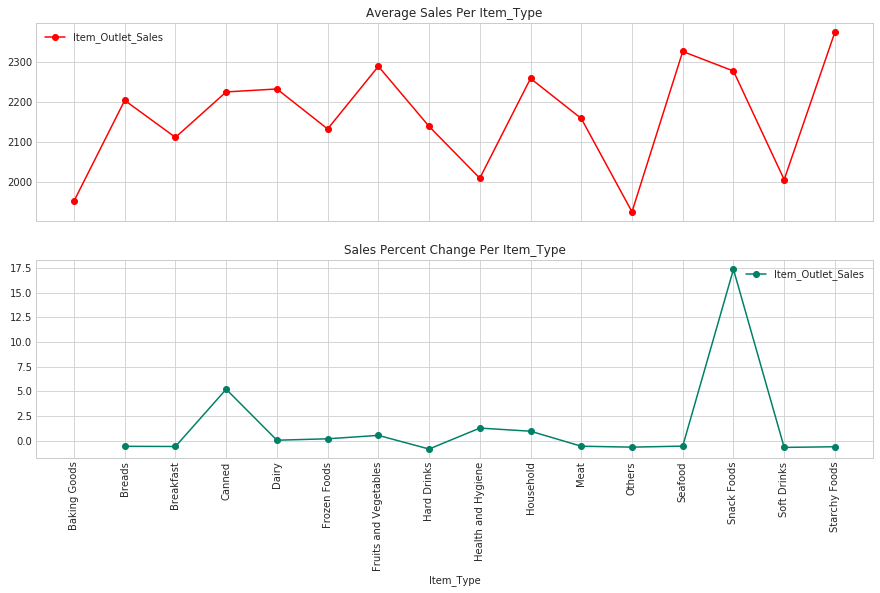

In [43]:
# plot average sales per Item_Type
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

fig1 = average_sales.plot(legend=True,ax=axis1,marker='o',colormap="flag", title="Average Sales Per Item_Type")
fig1.set_xticks(range(len(average_sales)))
fig1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales per Item_Type
fig2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change Per Item_Type")

In [44]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [45]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [46]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Years_of_Operation,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,19,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,9,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,19,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,train,20,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,train,31,...,0,1,0,0,0,0,0,0,0,0


In [47]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Years_of_Operation             int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
I

In [48]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("/home/sagar/SalesForecasting/dataset/train_cleaned.csv",index=False)
test.to_csv("/home/sagar/SalesForecasting/dataset/test_cleaned.csv",index=False)

In [49]:
# Reading modified data
train_Update = pd.read_csv("/home/sagar/SalesForecasting/dataset/train_cleaned.csv")
test_Update = pd.read_csv("/home/sagar/SalesForecasting/dataset/test_cleaned.csv")

In [50]:
train_Update.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Years_of_Operation,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,19,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,9,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,19,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.022930,19.20,OUT010,20,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.014670,8.93,OUT013,31,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
X_train = train_Update.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train_Update.Item_Outlet_Sales

In [52]:
X_test = test_Update.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [53]:
X_test.head()

,Item_MRP,Item_Visibility,Item_Weight,Years_of_Operation,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,107.8622,0.007565,20.750000,19,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,87.3198,0.038428,8.300000,11,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,241.7538,0.099575,14.600000,20,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,155.0340,0.015388,7.315000,11,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,234.2300,0.118599,12.792854,33,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Years_of_Operation,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,0.016047,9.30,19,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,9,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.50,19,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.022930,19.20,20,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,0.014670,8.93,31,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [56]:

# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression

In [57]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Predicting the test set results
y_pred1 = regressor.predict(X_test)

In [59]:
y_pred1

array([1842.48690608, 1470.16008932, 1876.6322138 , ..., 1812.38147213,
       3540.69977339, 1273.57875924])

In [60]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation, metrics


In [61]:
lr_accuracy = round(regressor.score(X_train,y_train),2)
lr_accuracy

0.56

In [62]:
r2_score(y_train, regressor.predict(X_train))

0.5635360801574905

In [63]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')


In [64]:
print(np.sqrt(np.abs(cv_score)))

[1151.02094383 1118.8828226  1113.20055504 1125.52178478 1140.63966243]


In [65]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


In [66]:
forecast = pd.DataFrame({
'Item_Identifier':test_Update['Item_Identifier'],
'Outlet_Identifier':test_Update['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred1
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [67]:
forecast.head() 

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1842.486906
1,FDW14,OUT017,1470.160089
2,NCN55,OUT010,1876.632214
3,FDQ58,OUT017,2588.299586
4,FDY38,OUT027,5189.696102


In [68]:
# Fitting AdaBoost Regression to the training set
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [69]:
y_pred2 = regressor.predict(X_test)

In [70]:
y_pred2

array([1932.63036509, 1850.30645423,  563.59152351, ..., 1941.45780594,
       3217.67202319, 1030.79454863])

In [71]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation, metrics


In [72]:
Ad_accuracy = round(regressor.score(X_train,y_train),2)
Ad_accuracy

0.53

In [73]:

r2_score(y_train, regressor.predict(X_train))

0.5306406815338183

In [74]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1212.1273454  1141.88498937 1184.88010588 1169.67056711 1169.39369765]


In [75]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1169


In [76]:
forecast = pd.DataFrame({
'Item_Identifier':test_Update['Item_Identifier'],
'Outlet_Identifier':test_Update['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred2
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [77]:
forecast.head() 

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1932.630365
1,FDW14,OUT017,1850.306454
2,NCN55,OUT010,563.591524
3,FDQ58,OUT017,3159.503105
4,FDY38,OUT027,5158.233251


In [78]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=300,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [79]:
# Predicting the test set results
y_pred3 = regressor.predict(X_test)
y_pred3

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3845.49167395, 1349.51290433])

In [80]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [81]:
r2_score(y_train, regressor.predict(X_train))

0.5883224219825491

In [82]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1135.93569436 1113.39546433 1141.5458154  1105.5367086  1125.98267765]


In [83]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1095


In [84]:
forecast = pd.DataFrame({
'Item_Identifier':test_Update['Item_Identifier'],
'Outlet_Identifier':test_Update['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred3
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [85]:
forecast.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1673.983987
1,FDW14,OUT017,1349.512904
2,NCN55,OUT010,471.306847
3,FDQ58,OUT017,2432.662581
4,FDY38,OUT027,5041.821497


In [86]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
# Predicting the test set results
y_pred4 = regressor.predict(X_test)
y_pred4

array([1663.99053003, 1374.61168307,  603.01511046, ..., 1962.1500083 ,
       3651.1468457 , 1302.9520938 ])

In [88]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [89]:
r2_score(y_train, regressor.predict(X_train))

0.6126865393831602

In [90]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1100.72559474 1076.73051685 1076.35588686 1068.49217944 1084.99892325]


In [91]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [92]:
forecast = pd.DataFrame({
'Item_Identifier':test_Update['Item_Identifier'],
'Outlet_Identifier':test_Update['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred4
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [93]:
forecast.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1663.990530
1,FDW14,OUT017,1374.611683
2,NCN55,OUT010,603.015110
3,FDQ58,OUT017,2504.785799
4,FDY38,OUT027,6248.743120


In [94]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor

In [95]:
best_xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=150,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [96]:
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=5, min_child_weight=1.5, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [97]:
y_pred5 = best_xgb_model.predict(X_test)
y_pred5

array([1555.2909 , 1315.5356 ,  713.91876, ..., 1743.6283 , 3676.3928 ,
       1260.1243 ], dtype=float32)

In [98]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation, metrics


In [99]:
xg_accuracy = round(best_xgb_model.score(X_train,y_train),2)
xg_accuracy

0.65

In [100]:
r2_score(y_train, best_xgb_model.predict(X_train))

0.6546547703912234

In [101]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1110.79413762 1085.31690944 1083.35348252 1091.21225717 1095.60831522]


In [102]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, best_xgb_model.predict(X_train))))

RMSE : 1003


In [103]:
forecast = pd.DataFrame({
'Item_Identifier':test_Update['Item_Identifier'],
'Outlet_Identifier':test_Update['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred5
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [104]:
forecast.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1555.290894
1,FDW14,OUT017,1315.535645
2,NCN55,OUT010,713.918762
3,FDQ58,OUT017,2698.862793
4,FDY38,OUT027,6105.888184


In [105]:
forecast.to_csv('/home/sagar/SalesForecasting/dataset/final_forecast.csv',index=False)